11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.3869 - val_loss: 0.1912
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1806 - val_loss: 0.1538
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1497 - val_loss: 0.1342
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1321 - val_loss: 0.1218
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1207 - val_loss: 0.1132
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1129 - val_loss: 0.1071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1071 - val_loss: 0.1026
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1030 - val_loss: 0.0995
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1001 - val_loss: 0.0971
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0978 - val_loss: 0.0955
Epoch 11/50
23

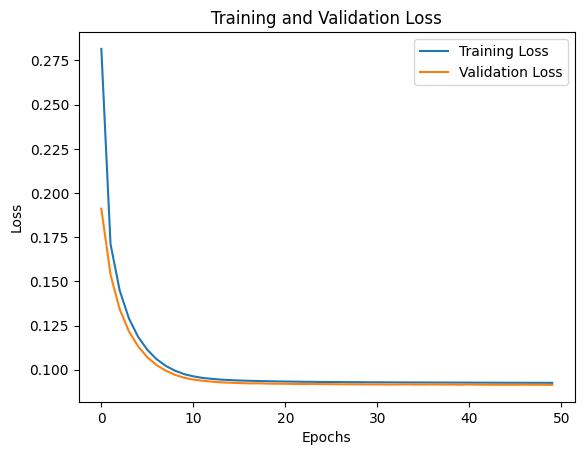

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


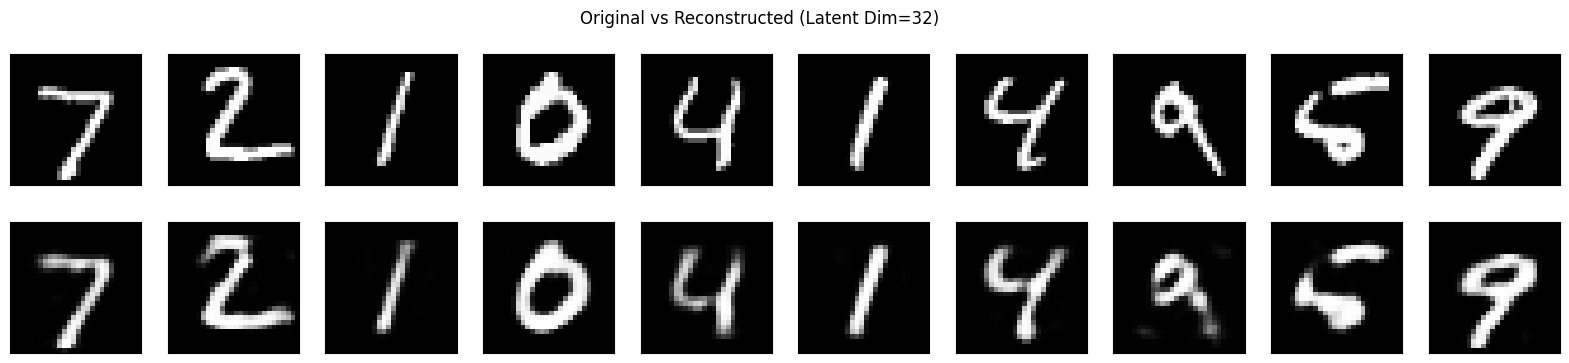


Training autoencoder with latent dimension 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


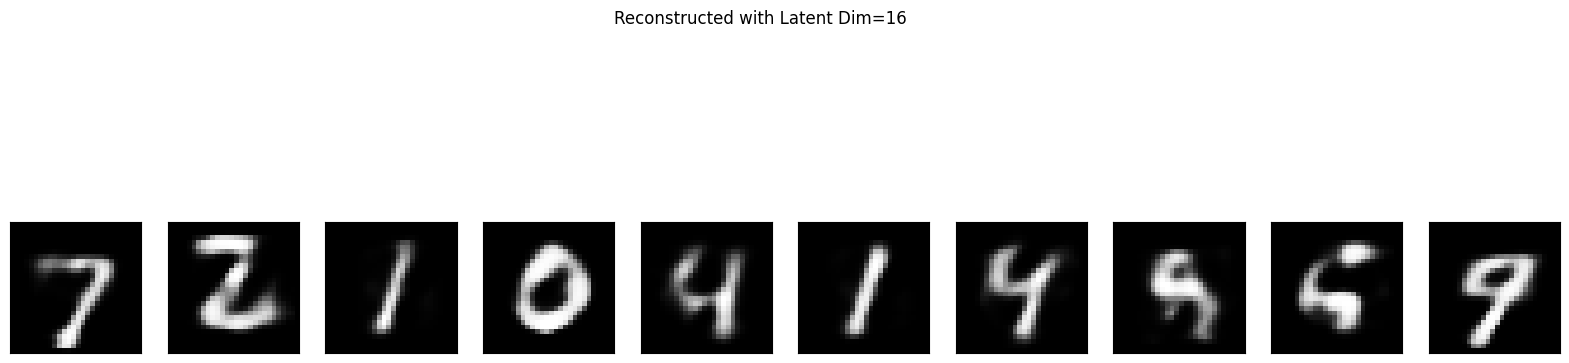


Training autoencoder with latent dimension 64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


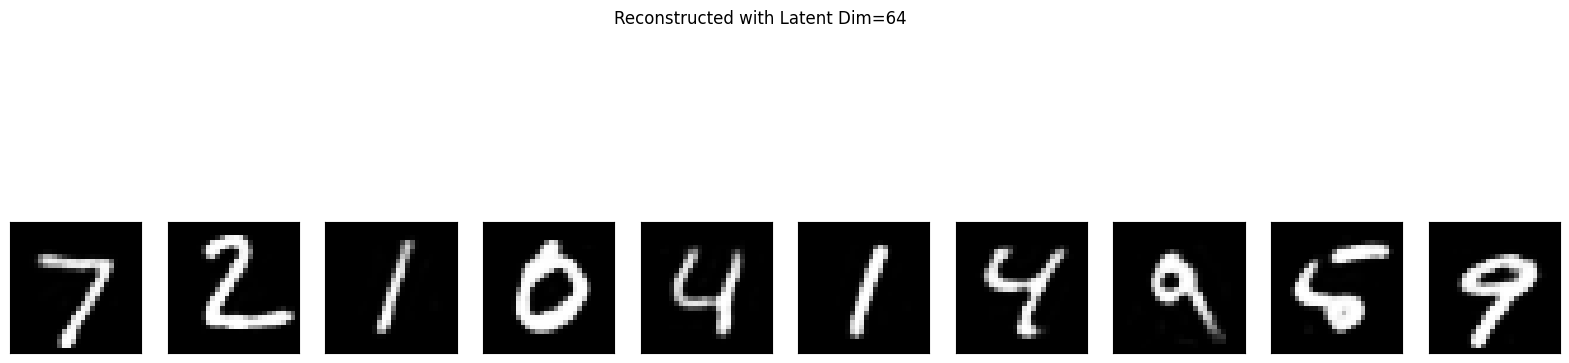


Training autoencoder with latent dimension 128


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


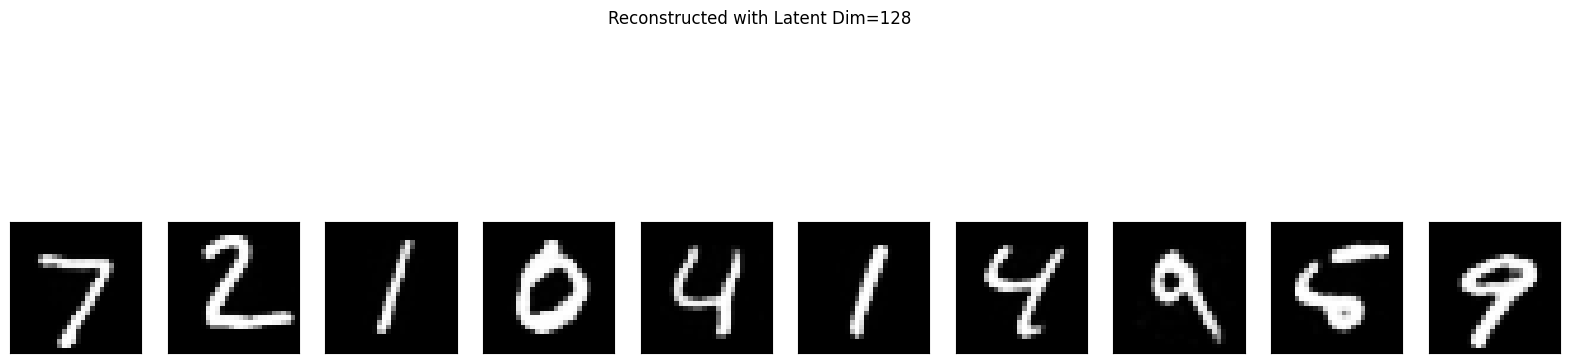

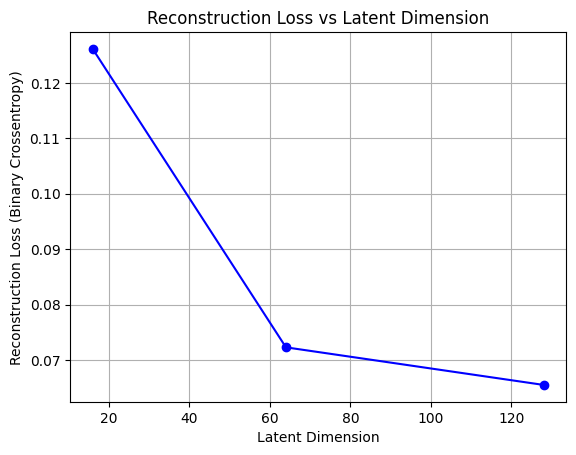

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1. Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to [0, 1] and flatten images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# 2. Define the autoencoder architecture
def build_autoencoder(latent_dim=32):
    # Encoder
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    # Encoder model (for visualization)
    encoder = Model(input_img, encoded)

    # Decoder model (for visualization)
    encoded_input = Input(shape=(latent_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))

    return autoencoder, encoder, decoder

# 3. Build, compile and train the autoencoder
latent_dim = 32
autoencoder, encoder, decoder = build_autoencoder(latent_dim)

autoencoder.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# 4. Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Reconstruct test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Display original vs reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle(f'Original vs Reconstructed (Latent Dim={latent_dim})')
plt.show()

# 5. Analyze different latent dimension sizes
latent_dims = [16, 64, 128]
reconstruction_losses = []

for dim in latent_dims:
    print(f"\nTraining autoencoder with latent dimension {dim}")
    autoencoder, encoder, decoder = build_autoencoder(dim)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001),
                        loss='binary_crossentropy')

    history = autoencoder.fit(x_train, x_train,
                              epochs=50,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(x_test, x_test),
                              verbose=0)

    # Store the final validation loss
    reconstruction_losses.append(history.history['val_loss'][-1])

    # Reconstruct and display some test images
    decoded_imgs = autoencoder.predict(x_test[:n])

    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(f'Reconstructed with Latent Dim={dim}')
    plt.show()

# Plot reconstruction loss vs latent dimension
plt.figure()
plt.plot(latent_dims, reconstruction_losses, 'bo-')
plt.title('Reconstruction Loss vs Latent Dimension')
plt.xlabel('Latent Dimension')
plt.ylabel('Reconstruction Loss (Binary Crossentropy)')
plt.grid(True)
plt.show()

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3696 - val_loss: 0.2248
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2128 - val_loss: 0.1789
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1752 - val_loss: 0.1602
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1586 - val_loss: 0.1490
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1490 - val_loss: 0.1423
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1420 - val_loss: 0.1372
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1375 - val_loss: 0.1336
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1339 - val_loss: 0.1311
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1317 - val_loss: 0.1288
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1296 - val_loss: 0.1278
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1284 - val_loss: 0.1270
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


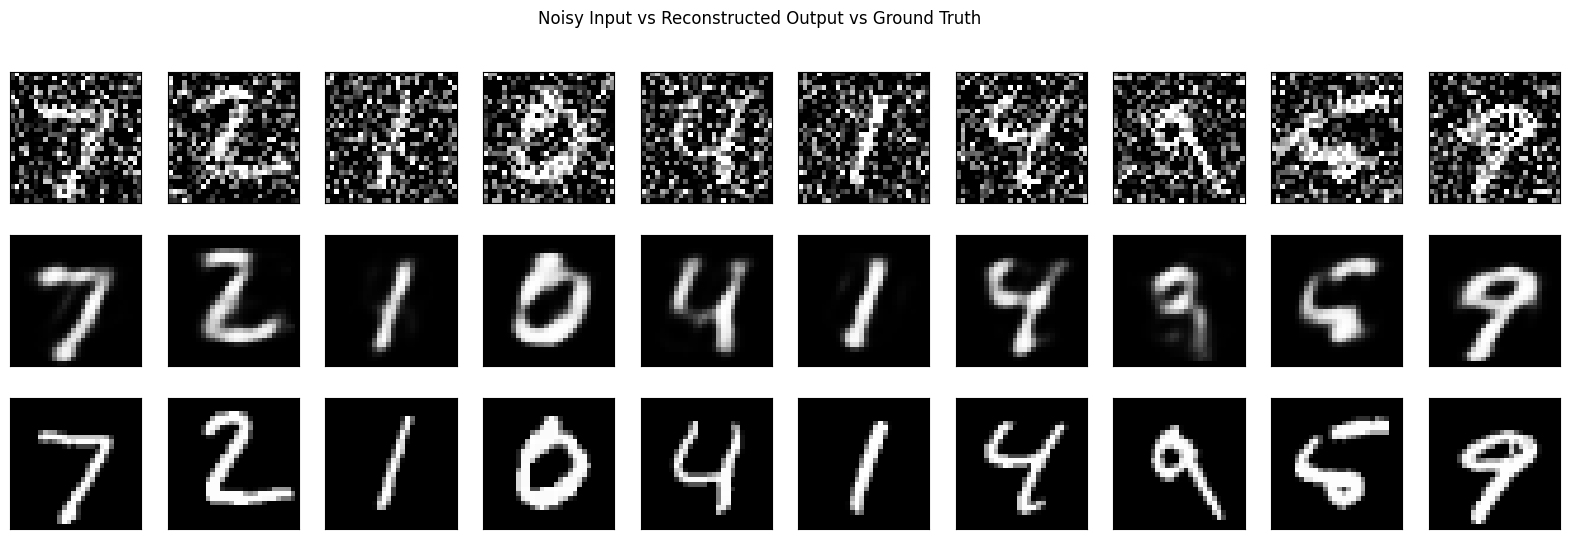

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Basic Autoencoder MSE on noisy inputs: 0.0798
Denoising Autoencoder MSE on noisy inputs: 0.0197


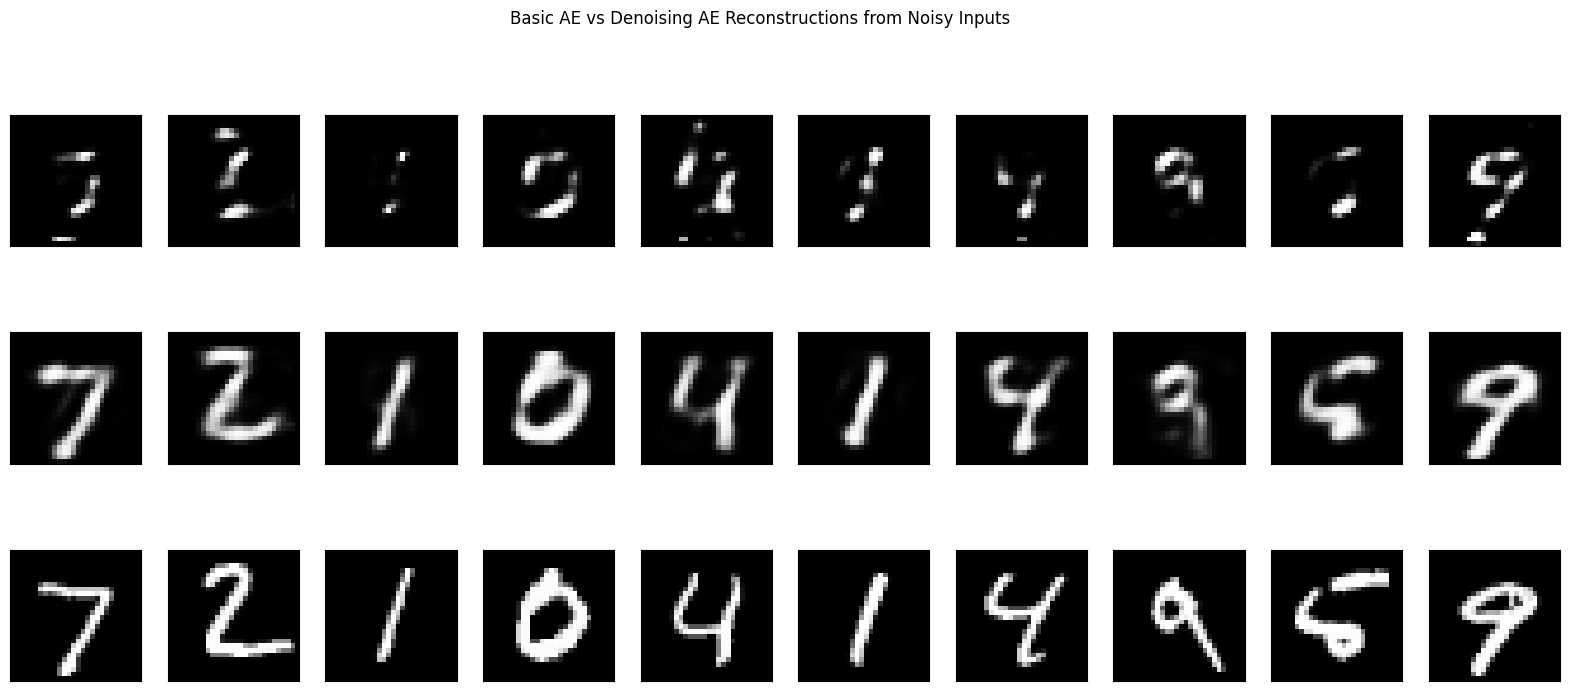

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1. Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to [0, 1] and flatten images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Function to add Gaussian noise
def add_noise(images, mean=0, std=0.5):
    noise = np.random.normal(mean, std, size=images.shape)
    noisy_images = images + noise
    # Clip to maintain valid pixel range
    return np.clip(noisy_images, 0., 1.)

# Create noisy versions of the data
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# 2. Define the denoising autoencoder (same architecture as before)
def build_denoising_autoencoder(latent_dim=32):
    # Encoder
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    return autoencoder

# 3. Build, compile and train the denoising autoencoder
latent_dim = 32
denoising_autoencoder = build_denoising_autoencoder(latent_dim)

denoising_autoencoder.compile(optimizer=Adam(learning_rate=0.001),
                             loss='binary_crossentropy')

history = denoising_autoencoder.fit(x_train_noisy, x_train,  # Noisy input, clean target
                                   epochs=50,
                                   batch_size=256,
                                   shuffle=True,
                                   validation_data=(x_test_noisy, x_test))

# 4. Visualize results
def plot_results(noisy_images, reconstructed_images, clean_images, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Noisy images
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed images
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Clean images
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(clean_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle('Noisy Input vs Reconstructed Output vs Ground Truth')
    plt.show()

# Get reconstructions
reconstructed_imgs = denoising_autoencoder.predict(x_test_noisy)
plot_results(x_test_noisy, reconstructed_imgs, x_test)

# 5. Compare with basic autoencoder (from Q1)
# For fair comparison, let's evaluate both on noisy inputs
basic_autoencoder = build_denoising_autoencoder(latent_dim)
basic_autoencoder.compile(optimizer=Adam(learning_rate=0.001),
                         loss='binary_crossentropy')
basic_autoencoder.fit(x_train, x_train,  # Basic AE trains on clean data
                      epochs=50,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test, x_test),
                      verbose=0)

# Evaluate both models on noisy test data
basic_reconstructions = basic_autoencoder.predict(x_test_noisy)
denoising_reconstructions = denoising_autoencoder.predict(x_test_noisy)

# Calculate MSE for comparison
def mse(x, y):
    return np.mean((x - y)**2)

basic_mse = mse(basic_reconstructions, x_test)
denoising_mse = mse(denoising_reconstructions, x_test)

print(f"\nBasic Autoencoder MSE on noisy inputs: {basic_mse:.4f}")
print(f"Denoising Autoencoder MSE on noisy inputs: {denoising_mse:.4f}")

# Visual comparison
plt.figure(figsize=(20, 8))
for i in range(n):
    # Basic AE reconstructions
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(basic_reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoising AE reconstructions
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoising_reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Ground truth
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.suptitle('Basic AE vs Denoising AE Reconstructions from Noisy Inputs')
plt.show()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 500)
Test data shape: (25000, 500)

Sample review (word indices): [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.4982 - loss: 0.6938 - val_accuracy: 0.5046 - val_loss: 0.6927
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.5123 - loss: 0.6908 - val_accuracy: 0.5120 - val_loss: 0.6905
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.5243 - loss: 0.6772 - val_accuracy: 0.5062 - val_loss: 0.6920
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.5336 - loss: 0.6584 - val_accuracy: 0.5178 - val_loss: 0.7018
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.5418 - loss: 0.6415 - val_accuracy: 0.5200 - val_loss: 0.7221
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.5403 - loss: 0.6377 - val_accuracy: 0.5212 - val_loss: 0.7160
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.5433 - loss: 0.6410 - val_accuracy: 0.5168 - val_loss: 0.7318
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.5483 - loss: 0.6366 - val_accu

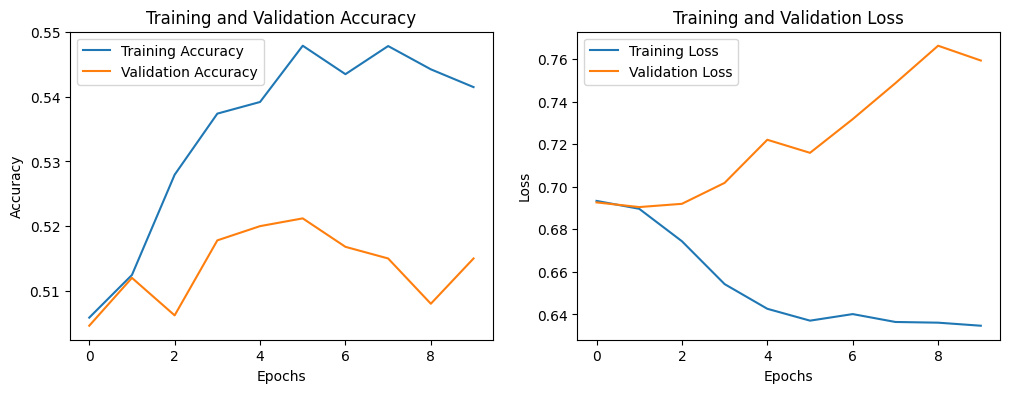

782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 124ms/step


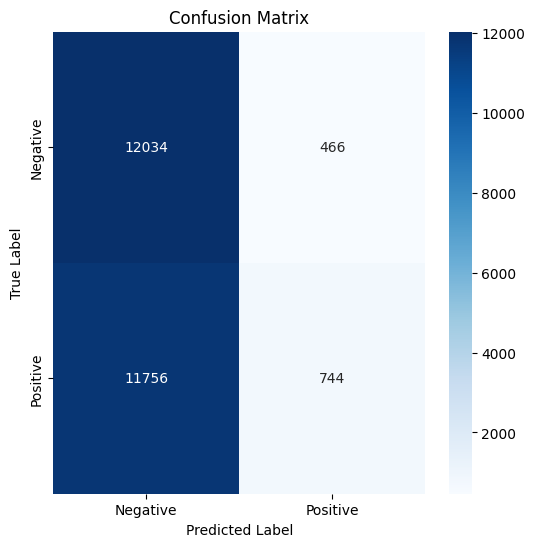


Classification Report:
              precision    recall  f1-score   support

    Negative       0.51      0.96      0.66     12500
    Positive       0.61      0.06      0.11     12500

    accuracy                           0.51     25000
   macro avg       0.56      0.51      0.39     25000
weighted avg       0.56      0.51      0.39     25000



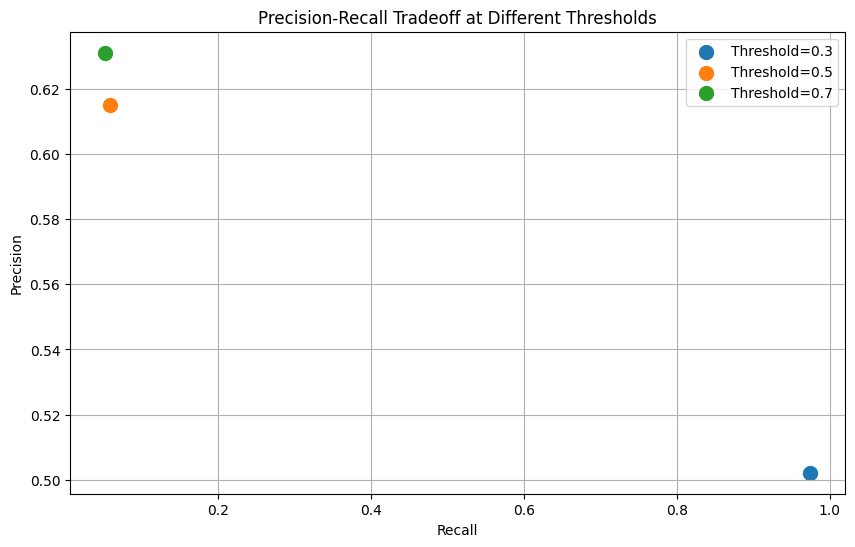

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and prepare the IMDB dataset
vocab_size = 10000  # Keep top n most frequent words
max_len = 500       # Maximum length of sequences

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2. Preprocess the data - pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("\nSample review (word indices):", x_train[0][:20])

# 3. Build the LSTM model
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 4. Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# 5. Precision-Recall Tradeoff Analysis
thresholds = [0.3, 0.5, 0.7]
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    y_pred_thresh = (y_pred_prob > threshold).astype(int)
    precision = tf.keras.metrics.Precision()(y_test, y_pred_thresh).numpy()
    recall = tf.keras.metrics.Recall()(y_test, y_pred_thresh).numpy()
    plt.scatter(recall, precision, s=100, label=f'Threshold={threshold}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Tradeoff at Different Thresholds')
plt.legend()
plt.grid()
plt.show()

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Padding sequences...
Building model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 476s 601ms/step - accuracy: 0.7140 - loss: 0.5472 - val_accuracy: 0.7764 - val_loss: 0.5096
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 482s 617ms/step - accuracy: 0.8261 - loss: 0.3997 - val_accuracy: 0.8518 - val_loss: 0.3490
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 484s 619ms/step - accuracy: 0.8572 - loss: 0.3323 - val_accuracy: 0.8432 - val_loss: 0.3630
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 482s 593ms/step - accuracy: 0.8955 - loss: 0.2602 - val_accuracy: 0.8664 - val_loss: 0.3576
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 528s 627ms/step - accuracy: 0.9147 - loss: 0.2167 - val_accuracy: 0.8650 - val_loss: 0.3362


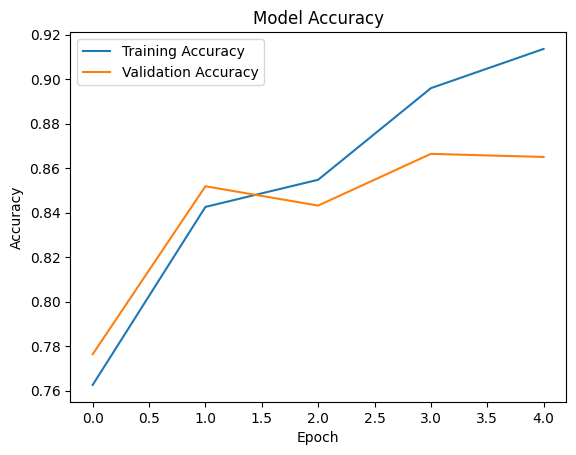

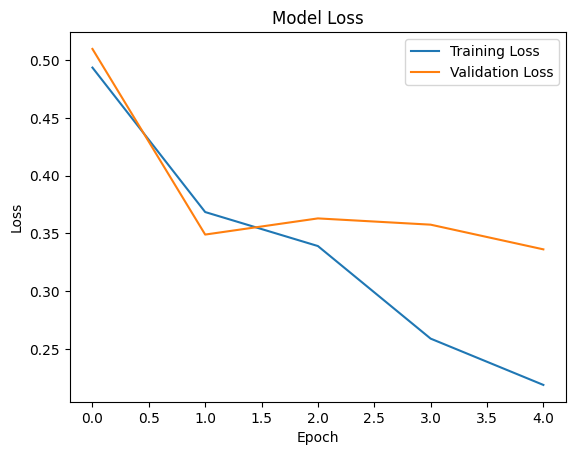

Evaluating model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step


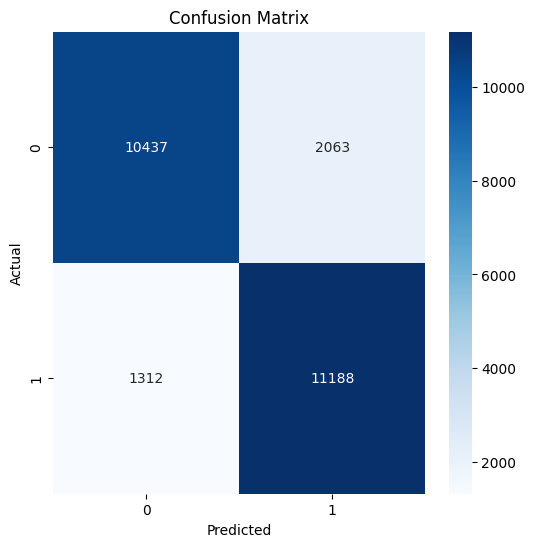


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     12500
           1       0.84      0.90      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000


Precision-Recall Tradeoff Explanation:

In sentiment classification, the precision-recall tradeoff is crucial because:

1. Business Impact: False positives (predicting positive for negative reviews) and 
   false negatives (predicting negative for positive reviews) have different consequences.

2. Class Imbalance: Many real-world sentiment datasets are imbalanced. Optimizing for 
   both precision and recall ensures good performance on minority classes.

3. Use Case Dependency:
   - High precision is important when you want to be very sure of your positive predictions
   - High recall is important when you want to capture most positive case

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the IMDB dataset
vocab_size = 5000  # Keep top 5000 most frequent words
max_len = 200      # Maximum length of sequences

print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to make them uniform length
print("Padding sequences...")
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build LSTM model
print("Building model...")
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# Train the model
print("Training model...")
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test)
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model
print("Evaluating model...")
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Precision-Recall Tradeoff Explanation
print("\nPrecision-Recall Tradeoff Explanation:")
print("""
In sentiment classification, the precision-recall tradeoff is crucial because:

1. Business Impact: False positives (predicting positive for negative reviews) and
   false negatives (predicting negative for positive reviews) have different consequences.

2. Class Imbalance: Many real-world sentiment datasets are imbalanced. Optimizing for
   both precision and recall ensures good performance on minority classes.

3. Use Case Dependency:
   - High precision is important when you want to be very sure of your positive predictions
   - High recall is important when you want to capture most positive cases

4. Threshold Tuning: The default 0.5 threshold can be adjusted based on whether
   precision or recall is more important for your specific application.
""")